# EcoTech Connect Workshop on RL!

## 1. Setting: What is RL?

Machine learning for sequential decisions made on observations! (Think like a computer playing a board game: the computer observes e.g. your card deck, the cards that are on the table, etc., then makes an action which alters the state of the game, and then a new 'turn' starts.)

RL has two components:
- the 'environment' which is the 'system' with which the computer interacts. E.g. it is the thing that keeps track of what is the current 'state' of the game (which cards are on which deck, which cards are on the table, in which order, etc.)
- The learning algorithm: how the computer gathers experience (interactions with the game), how the computer updates its strategy

## 2. How do people do RL?

Many options, but the one I've been using a lot is:
- Gymnasium framework for environments
- Stable baselines framework for learning algorithms

## 3. Gymnasium environments

In [1]:
import fishing

In [2]:
fishing_env = fishing.harvested_system()

In [3]:
fishing_env.reset()
fishing_env.step(action=[-1])

(array([-0.3613845], dtype=float32),
 array([0.], dtype=float32),
 False,
 False,
 {})

In [4]:
import dynamics as dyn

simulation = dyn.simulate_dynamics(
    T = fishing_env.max_t,
    params = fishing_env.parameters,
    init_pop = 0.5
)

import pandas as pd

sim_df = pd.DataFrame(simulation)

<Axes: xlabel='t'>

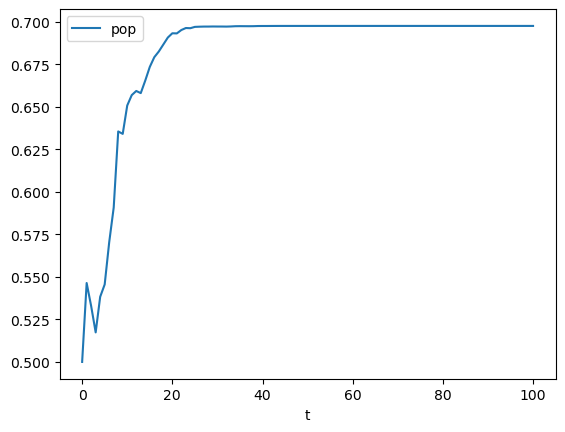

In [5]:
sim_df.plot(x='t')

In [6]:
from stable_baselines3 import PPO

In [7]:
agent = PPO("MlpPolicy", env=fishing_env, verbose=0, tensorboard_log="../../logs")

In [8]:
agent.learn(total_timesteps = 1_000_000, progress_bar=True)

Output()

In [9]:
# plot the policy
import numpy as np
import pandas as pd

policy_data = {
    'population': [],
    'harvest_intensity': [],
}

fishing_env.reset()
for pop in np.linspace(0, 0.8):
    fishing_env.pop = np.array([pop], dtype=np.float32)
    obs = fishing_env.observe()
    action = agent.predict(obs)
    harvest_intensity = fishing_env.compute_harvest(action)[0]
    policy_data['population'].append(pop)
    policy_data['harvest_intensity'].append(harvest_intensity)

policy_df = pd.DataFrame(policy_data)

In [ ]:
policy_df.plot(x='population')

In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
n_eps = 50
rewards, ep_lengths = evaluate_policy(model = agent, env = fishing_env, n_eval_episodes=n_eps, return_episode_rewards=True)

pd.DataFrame({
    'reward': rewards,
}).hist()